# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_BraveBrowser_1.csv")
df.head()

,userName,score,at,content
0,Amarullah Alhaqoni,5,2024-06-04 20:23:06,Keren
1,Noval Yusuf,3,2024-06-04 20:04:00,Uk I
2,dwi maryono,5,2024-06-04 16:44:45,siip
3,Randi Dwi pranoto,2,2024-06-04 14:41:01,"Sering masalah Disconect, tingkatin lagi untuk..."
4,Rosa Saja,1,2024-06-04 13:54:01,g bisa di download


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Keren,Amarullah Alhaqoni,2024-06-04 20:23:06
1,Uk I,Noval Yusuf,2024-06-04 20:04:00
2,siip,dwi maryono,2024-06-04 16:44:45
3,"Sering masalah Disconect, tingkatin lagi untuk...",Randi Dwi pranoto,2024-06-04 14:41:01
4,g bisa di download,Rosa Saja,2024-06-04 13:54:01
...,...,...,...
194,"Udah beberapa bulan ini , brave bukan lagi bro...",Fasanime,2024-05-01 04:45:51
195,tanpa iklan,Syamsur Rahmatillah,2024-04-30 23:02:00
196,mantap dah,Ihsan Alfarizi,2024-04-30 21:32:21
197,Anjay,Aty,2024-04-30 15:31:40


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,180,199,198
top,Bagus,Amarullah Alhaqoni,2024-06-03 17:23:57
freq,4,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(180, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,keren,Amarullah Alhaqoni,2024-06-04 20:23:06
1,uk i,Noval Yusuf,2024-06-04 20:04:00
2,siip,dwi maryono,2024-06-04 16:44:45
3,sering masalah disconect tingkatin lagi untuk ...,Randi Dwi pranoto,2024-06-04 14:41:01
4,g bisa di download,Rosa Saja,2024-06-04 13:54:01
...,...,...,...
194,udah beberapa bulan ini brave bukan lagi brows...,Fasanime,2024-05-01 04:45:51
195,tanpa iklan,Syamsur Rahmatillah,2024-04-30 23:02:00
196,mantap dah,Ihsan Alfarizi,2024-04-30 21:32:21
197,anjay,Aty,2024-04-30 15:31:40


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,keren,Amarullah Alhaqoni,2024-06-04 20:23:06
1,uk i,Noval Yusuf,2024-06-04 20:04:00
2,siip,dwi maryono,2024-06-04 16:44:45
3,sering masalah disconect tingkatin lagi untuk ...,Randi Dwi pranoto,2024-06-04 14:41:01
4,g bisa di download,Rosa Saja,2024-06-04 13:54:01
...,...,...,...
194,udah beberapa bulan ini brave bukan lagi brows...,Fasanime,2024-05-01 04:45:51
195,tanpa iklan,Syamsur Rahmatillah,2024-04-30 23:02:00
196,mantap dah,Ihsan Alfarizi,2024-04-30 21:32:21
197,anjay,Aty,2024-04-30 15:31:40


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,keren,Amarullah Alhaqoni,2024-06-04 20:23:06
1,uk i,Noval Yusuf,2024-06-04 20:04:00
2,siip,dwi maryono,2024-06-04 16:44:45
3,sering masalah disconect tingkatin untuk masal...,Randi Dwi pranoto,2024-06-04 14:41:01
4,g di download,Rosa Saja,2024-06-04 13:54:01
...,...,...,...
194,udah beberapa bulan brave bukan browser ilangi...,Fasanime,2024-05-01 04:45:51
195,iklan,Syamsur Rahmatillah,2024-04-30 23:02:00
196,mantap dah,Ihsan Alfarizi,2024-04-30 21:32:21
197,anjay,Aty,2024-04-30 15:31:40


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                [keren]
1                                                [uk, i]
2                                                 [siip]
3      [sering, masalah, disconect, tingkatin, untuk,...
4                                      [g, di, download]
                             ...                        
194    [udah, beberapa, bulan, brave, bukan, browser,...
195                                              [iklan]
196                                        [mantap, dah]
197                                              [anjay]
198                                           [niceeeee]
Name: content, Length: 180, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BraveBrowser_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BraveBrowser_1.csv', encoding = 'latin1')
df_clean

,content
0,keren
1,uk i
2,siip
3,sering masalah disconect tinggaatin untuk masa...
4,g di download
...,...
175,udah beberapa bulan brave bukan browser ilangi...
176,iklan
177,mantap dah
178,anjay


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BraveBrowser_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BraveBrowser_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BraveBrowser_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,keren,Cool.
1,1,uk i,Uk i
2,2,siip,siip
3,3,sering masalah disconect tinggaatin untuk masa...,It's often a discontin issue for the streaming...
4,4,g di download,g downloaded
...,...,...,...
175,175,udah beberapa bulan brave bukan browser ilangi...,It's been a few months. Brave is not a commerc...
176,176,iklan,ads
177,177,mantap dah,That's great.
178,178,anjay,anjay


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BraveBrowser_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,keren,Cool.
1,1,uk i,Uk i
2,2,siip,siip
3,3,sering masalah disconect tinggaatin untuk masa...,It's often a discontin issue for the streaming...
4,4,g di download,g downloaded
...,...,...,...
175,175,udah beberapa bulan brave bukan browser ilangi...,It's been a few months. Brave is not a commerc...
176,176,iklan,ads
177,177,mantap dah,That's great.
178,178,anjay,anjay


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 97
Netral = 66
Negatif = 17

Total Data Seluruhnya : 180


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,keren,Cool.,Positif
1,1,uk i,Uk i,Netral
2,2,siip,siip,Netral
3,3,sering masalah disconect tinggaatin untuk masa...,It's often a discontin issue for the streaming...,Netral
4,4,g di download,g downloaded,Netral
...,...,...,...,...
175,175,udah beberapa bulan brave bukan browser ilangi...,It's been a few months. Brave is not a commerc...,Positif
176,176,iklan,ads,Netral
177,177,mantap dah,That's great.,Positif
178,178,anjay,anjay,Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,keren,Cool.,Positif
1,uk i,Uk i,Netral
2,siip,siip,Netral
3,sering masalah disconect tinggaatin untuk masa...,It's often a discontin issue for the streaming...,Netral
4,g di download,g downloaded,Netral
...,...,...,...
175,udah beberapa bulan brave bukan browser ilangi...,It's been a few months. Brave is not a commerc...,Positif
176,iklan,ads,Netral
177,mantap dah,That's great.,Positif
178,anjay,anjay,Netral


# **Visualisasi**


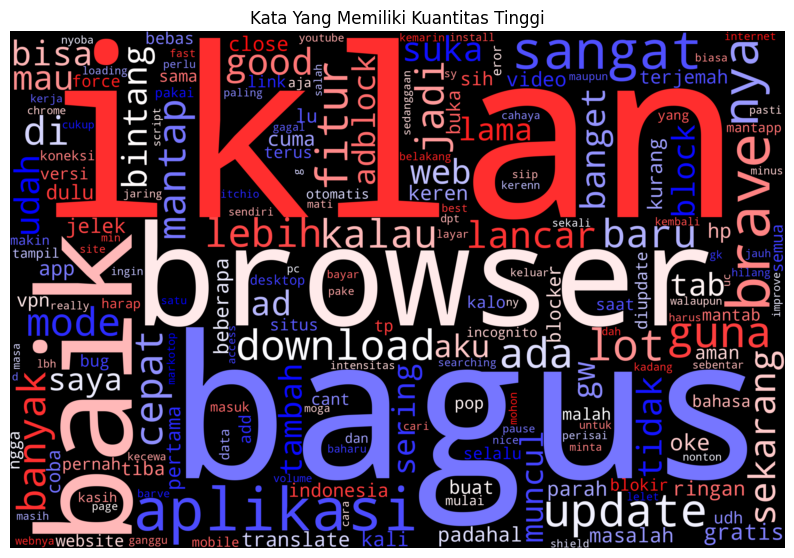

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


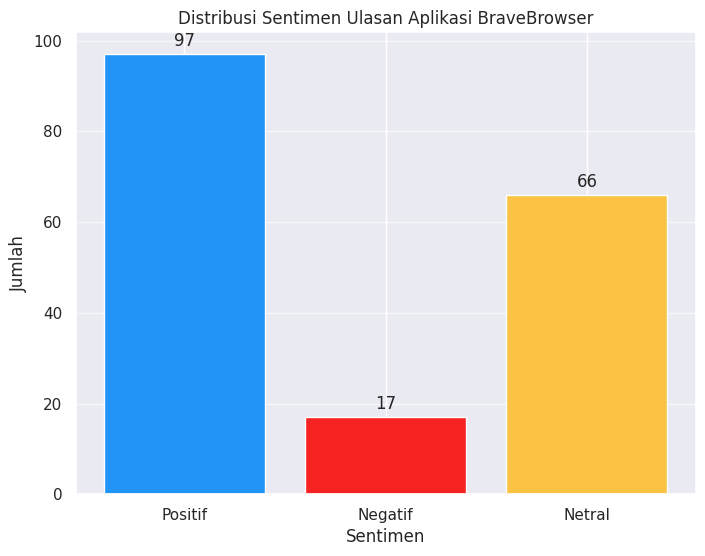

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BraveBrowser")


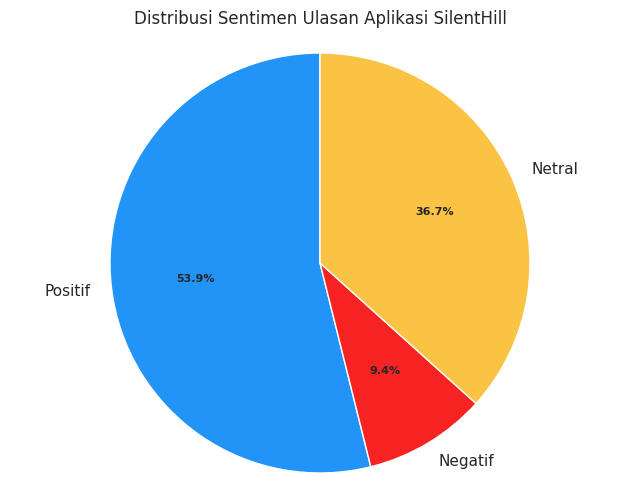

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")

In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,keren,Cool.,Positif
5,seperti aplikasi brave baru hari aplikasi sela...,Like a new brave program day application alway...,Positif
7,mantap,Steady.,Positif
9,bagus,Good.,Positif
12,gw udah lama pake brave semenjak ucbrowser dow...,I've been wearing the brave since the ucbrowse...,Positif
...,...,...,...
170,makin lot anjyang mau instal saranin jangancar...,The more lots of people want to install the su...,Positif
172,sangat kecewa,Very disappointed.,Negatif
174,bagus tana iklan,Good ad tana,Positif
175,udah beberapa bulan brave bukan browser ilangi...,It's been a few months. Brave is not a commerc...,Positif


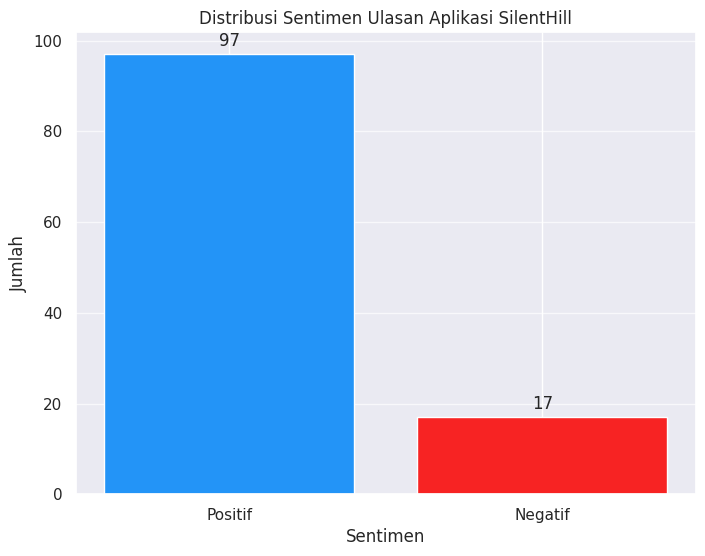

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")


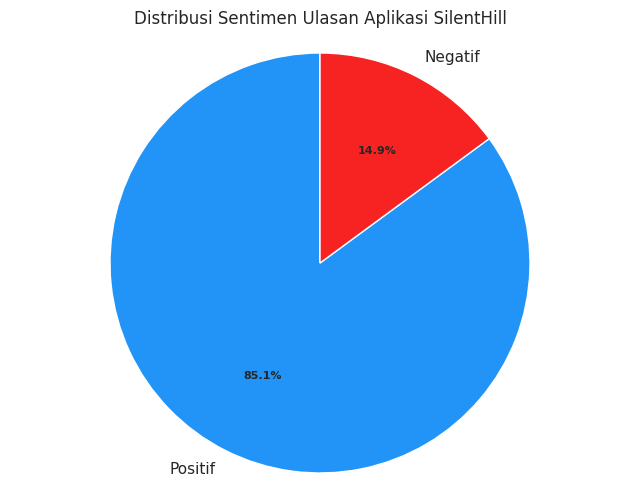

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")

In [41]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,keren,Cool.,1
5,seperti aplikasi brave baru hari aplikasi sela...,Like a new brave program day application alway...,1
7,mantap,Steady.,1
9,bagus,Good.,1
12,gw udah lama pake brave semenjak ucbrowser dow...,I've been wearing the brave since the ucbrowse...,1
...,...,...,...
170,makin lot anjyang mau instal saranin jangancar...,The more lots of people want to install the su...,1
172,sangat kecewa,Very disappointed.,0
174,bagus tana iklan,Good ad tana,1
175,udah beberapa bulan brave bukan browser ilangi...,It's been a few months. Brave is not a commerc...,1


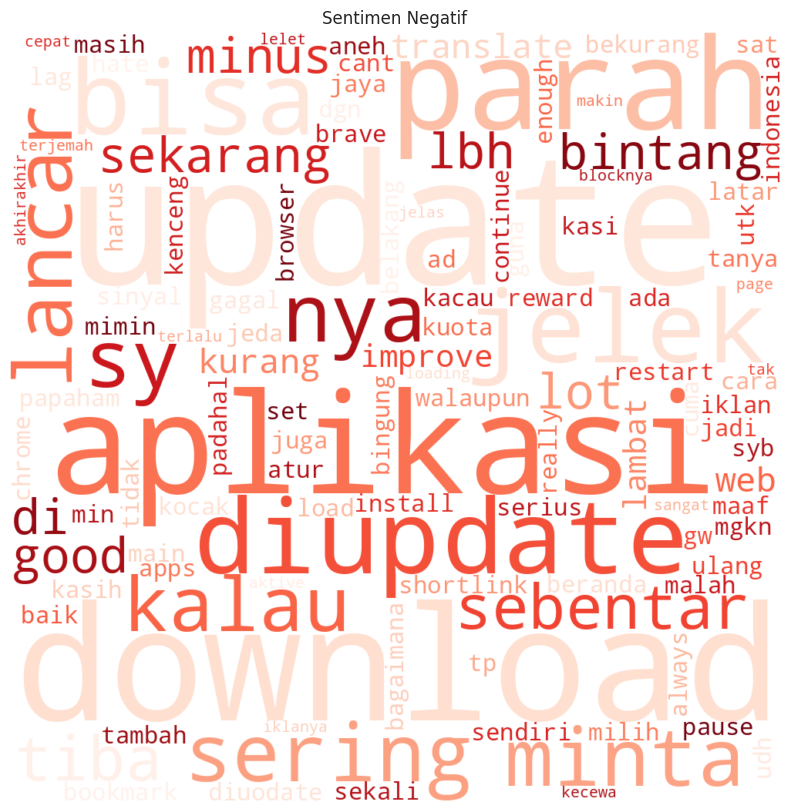

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

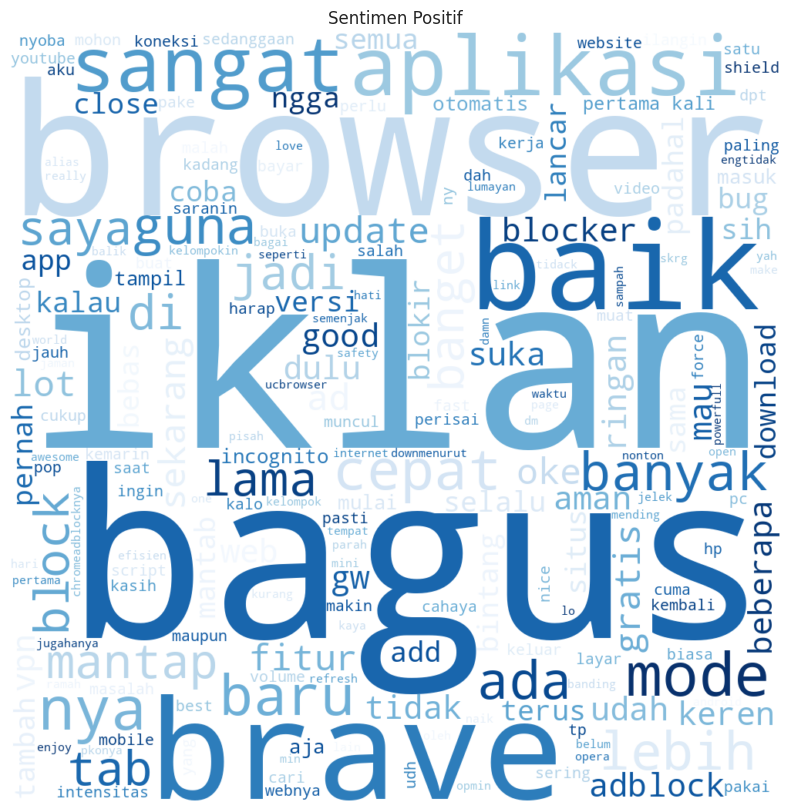

In [43]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    97
0    17
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train

47       sangat bagus aplikasi nya iklan nya nggk bnyakk
98     aplikasi nya sih oke cuman jaring lelet lot se...
174                                     bagus tana iklan
169                                            lot jelas
32                                              the best
                             ...                        
167    aplikasi baik pernah aku install iklan benarbe...
23     dulu sangat bagus skrg pop up iklan sering muncul
143                                          sangat muas
75                                                   oke
157     diupdate makin lelet download aplikasi tak jelas
Name: content, Length: 91, dtype: object

In [48]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [49]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.9130434782608695
Akurasi untuk c = 0.05: 0.9130434782608695
Akurasi untuk c = 0.25: 0.9130434782608695
Akurasi untuk c = 0.5: 0.9565217391304348
Akurasi untuk c = 0.75: 0.9565217391304348
Akurasi untuk c = 1: 0.9130434782608695


In [52]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [53]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.9130434782608695 


In [54]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.91
[[ 1  1]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.95      0.95      0.95        21

    accuracy                           0.91        23
   macro avg       0.73      0.73      0.73        23
weighted avg       0.91      0.91      0.91        23



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 1  1]
 [ 1 20]]

True Positives (TP) =  1

True Negatives (TN) =  20

False Positives (FP) =  1

False Negatives (FN) =  1

Accuracy =  0.9130434782608695


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

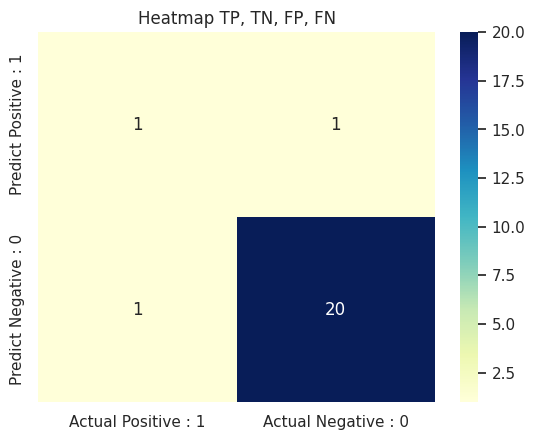

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9130


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0870


# **Testing**


In [60]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus banget
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 90.74%
Probabilitas: 90.74462240118673 %


In [61]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : sesudah di update jadi jelek
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 72.39%
Probabilitas: 72.38857592934805 %
